In [224]:
from pgmpy.models import MarkovModel
from pgmpy.factors import Factor
from pgmpy.readwrite import XMLBIFWriter
from pgmpy.inference import BeliefPropagation
import scipy.stats as stats
import numpy as np
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/jonathanhilgart/anaconda/envs/SVB/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [225]:
esp_eligible_products = ['Money Market Bonus','Collateral MMA'
'Cash Management',
'FX Products',
'Letters of Credit',
'Enterprise Sweep',
'Checking USD']

In [226]:
## define a probability distribution over each pair of varaibles
def esp_money_market_conditional_probabilities(month_number):
    """Returns the conditions probabilities of money market and every other ESP product.
    Compute the probabilities distribution of money market = yes and moeny market = 0 no, then take the
    complement to find the corresponding probabilities for the other class.
    
    Returns a dictionary of each probabilitiy distribution given the time"""
    
    mmb1_and_cmma1_dist = stats.norm(loc = 15, scale=2)
    mmb0_and_cmma1_dist = stats.norm(loc = 85, scale=20)
    
    mmb1_and_checking1_dist = stats.norm(loc = 25, scale=10)
    mmb0_and_checking1_dist = stats.norm(loc = 5, scale=1)
    
    mmb1_and_cm1_dist = stats.norm(loc = 45, scale=5)
    mmb0_and_cm1_dist = stats.norm(loc = 38, scale=21)
    
    mmb1_and_fx1_dist = stats.norm(loc = 15, scale=55)
    mmb0_and_fx1_dist = stats.norm(loc = 150, scale=55)
    
    mmb1_and_loc1_dist = stats.norm(loc = 35, scale=25)
    mmb0_and_loc1_dist = stats.norm(loc = 15, scale=21)
    
    mmb1_and_es1_dist = stats.norm(loc = 185, scale=95)
    mmb0_and_es1_dist = stats.norm(loc = 85, scale=55)
    
    # find the probabilities given a month number
    mmb1_cmma1 = mmb1_and_cmma1_dist.pdf(month_number)
    mmb1_cmma0 = 1-mmb1_cmma1
    mmb0_cmma1 = mmb0_and_cmma1_dist.pdf(month_number)
    mmb0_cmma0 = 1-mmb0_cmma1
    
    mmb1_checking1 = mmb1_and_checking1_dist.pdf(month_number)
    mmb1_checking0 = 1 - mmb1_checking1
    mmb0_checking1 = mmb0_and_checking1_dist.pdf(month_number)
    mmb0_checking0 = 1-mmb0_checking1
    
    mmb1_cm1 = mmb1_and_cm1_dist.pdf(month_number)
    mmb1_cm0 = 1 - mmb1_cm1
    mmb0_cm1 = mmb0_and_cm1_dist.pdf(month_number)
    mmb0_cm0 = 1-mmb0_cm1
    
    mmb1_fx1 = mmb1_and_fx1_dist.pdf(month_number)
    mmb1_fx0 = 1 - mmb1_fx1
    mmb0_fx1 = mmb0_and_fx1_dist.pdf(month_number)
    mmb0_fx0 = 1-mmb0_fx1
    
    mmb1_loc1 = mmb1_and_loc1_dist.pdf(month_number)
    mmb1_loc0 = 1 - mmb1_loc1
    mmb0_loc1 = mmb0_and_loc1_dist.pdf(month_number)
    mmb0_loc0 = 1-mmb0_loc1
    
    mmb1_es1 = mmb1_and_es1_dist.pdf(month_number)
    mmb1_es0 = 1 - mmb1_es1
    mmb0_es1 = mmb0_and_es1_dist.pdf(month_number)
    mmb0_es0 = 1-mmb0_es1
    
    # return the probabilities in the form of a dictionary
    money_market_conditional_probabilities = {}
    money_market_conditional_probabilities['mmb1_cmma1'] = mmb1_cmma1
    money_market_conditional_probabilities['mmb1_cmma0'] = mmb1_cmma0
    money_market_conditional_probabilities['mmb0_cmma1'] = mmb0_cmma1
    money_market_conditional_probabilities['mmb0_cmma0'] = mmb0_cmma0
    
    money_market_conditional_probabilities['mmb1_checking1'] = mmb1_checking1
    money_market_conditional_probabilities['mmb1_checking0'] = mmb1_checking0
    money_market_conditional_probabilities['mmb0_checking1'] = mmb0_checking1
    money_market_conditional_probabilities['mmb0_checking0'] = mmb0_checking0
    
    money_market_conditional_probabilities['mmb1_cm1'] = mmb1_cm1
    money_market_conditional_probabilities['mmb1_cm0'] = mmb1_cm0
    money_market_conditional_probabilities['mmb0_cm1'] = mmb0_cm1
    money_market_conditional_probabilities['mmb0_cm0'] = mmb0_cm0
    
    money_market_conditional_probabilities['mmb1_fx1'] = mmb1_fx1
    money_market_conditional_probabilities['mmb1_fx0'] = mmb1_fx0
    money_market_conditional_probabilities['mmb0_fx1'] = mmb0_fx1
    money_market_conditional_probabilities['mmb0_fx0'] = mmb0_fx0
    
    money_market_conditional_probabilities['mmb1_loc1'] = mmb1_loc1
    money_market_conditional_probabilities['mmb1_loc0'] = mmb1_loc0
    money_market_conditional_probabilities['mmb0_loc1'] = mmb0_loc1
    money_market_conditional_probabilities['mmb0_loc0'] = mmb0_loc0
    
    money_market_conditional_probabilities['mmb1_es1'] = mmb1_es1
    money_market_conditional_probabilities['mmb1_es0'] = mmb1_es0
    money_market_conditional_probabilities['mmb0_es1'] = mmb0_es1
    money_market_conditional_probabilities['mmb0_es0'] = mmb0_es0
    
    
    return money_market_conditional_probabilities
    
    
    

    

In [227]:
dict_of_esp_money_market_cpd = esp_money_market_conditional_probabilities(40) 
dict_of_esp_money_market_cpd 

{'mmb0_checking0': 1.0,
 'mmb0_checking1': 3.9403962771360244e-267,
 'mmb0_cm0': 0.98108870881910382,
 'mmb0_cm1': 0.018911291180896208,
 'mmb0_cmma0': 0.99841301740821664,
 'mmb0_cmma1': 0.0015869825917833708,
 'mmb0_es0': 0.99480979696548355,
 'mmb0_es1': 0.0051902030345164548,
 'mmb0_fx0': 0.99901834606339657,
 'mmb0_fx1': 0.00098165393660341925,
 'mmb0_loc0': 0.99064718349885705,
 'mmb0_loc1': 0.0093528165011429291,
 'mmb1_checking0': 0.98704824043341077,
 'mmb1_checking1': 0.012951759566589175,
 'mmb1_cm0': 0.95160585509617135,
 'mmb1_cm1': 0.048394144903828672,
 'mmb1_cmma0': 1.0,
 'mmb1_cmma1': 2.3475976789875732e-35,
 'mmb1_es0': 0.99868987846256363,
 'mmb1_es1': 0.0013101215374364088,
 'mmb1_fx0': 0.99345842622158864,
 'mmb1_fx1': 0.006541573778411333,
 'mmb1_loc0': 0.98435829224098181,
 'mmb1_loc1': 0.015641707759018235}

In [290]:
model = MarkovModel([('money_market_bonus', 'collateral_mma'), ('money_market_bonus', 'checking_usd'), 
                     ('money_market_bonus', 'cash_management'), ('money_market_bonus', 'fx_products'),
                    ('money_market_bonus', 'letters_of_credit'), ('money_market_bonus', 'enterprise_sweep')])#,
                     
#                      ('collateral_mma', 'checking_usd'), ('collateral_mma', 'cash_management'), 
#                      ('collateral_mma', 'fx_products'), ('collateral_mma', 'letters_of_credit'),
#                     ('collateral_mma', 'enterprise_sweep')
                     
#                     ])
esp_eligible_products = ['Money Market Bonus','Collateral MMA'
'Cash Management',
'FX Products',
'Letters of Credit',
'Enterprise Sweep',
'Checking USD']

def esp_product_probability_over_time(esp_money_market_conditional_probabilities,month_n= None,
                                      product_name = None,range_of_months=72,evidence_=None):
    """Returns the probability of having a given ESP product during a certain month. 
    If no month_n is given, then will return distributions of each product per month for 24 months. 
    Otherwise, will only products for that month.
    If no product_name is given, then will return all products for a given month. Or, that particular product"""
    prob_mmb = []
    prob_cmma = []
    prob_cm = []
    prob_fx = []
    prob_loc = []
    prob_es = []
    prob_checking = []
    
    if month_n != None:
        pass
    else:
        for month_n in range(range_of_months):
            dict_of_esp_money_market_cpd = esp_money_market_conditional_probabilities(month_n) 

            factor_mmb_cmma = Factor(variables=['money_market_bonus', 'collateral_mma'],
                                cardinality=[2, 2],
                                values=[dict_of_esp_money_market_cpd['mmb0_cmma0'], dict_of_esp_money_market_cpd['mmb0_cmma1'],
                                        dict_of_esp_money_market_cpd['mmb1_cmma0'], dict_of_esp_money_market_cpd['mmb1_cmma1']])
            factor_mmb_cm = Factor(variables=['money_market_bonus', 'cash_management'],
                                cardinality=[2, 2],
                                values=[dict_of_esp_money_market_cpd['mmb0_cm0'], dict_of_esp_money_market_cpd['mmb0_cm1'],
                                        dict_of_esp_money_market_cpd['mmb1_cm0'], dict_of_esp_money_market_cpd['mmb1_cm1']])
            factor_mmb_fx = Factor(variables=['money_market_bonus', 'fx_products'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_money_market_cpd['mmb0_fx0'], dict_of_esp_money_market_cpd['mmb0_fx1'],
                                        dict_of_esp_money_market_cpd['mmb1_fx0'], dict_of_esp_money_market_cpd['mmb1_fx1']])
            factor_mmb_loc = Factor(variables=['money_market_bonus', 'letters_of_credit'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_money_market_cpd['mmb0_loc0'], dict_of_esp_money_market_cpd['mmb0_loc1'],
                                        dict_of_esp_money_market_cpd['mmb1_loc0'], dict_of_esp_money_market_cpd['mmb1_loc1']])
            factor_mmb_es = Factor(variables=['money_market_bonus', 'enterprise_sweep'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_money_market_cpd['mmb0_es0'], dict_of_esp_money_market_cpd['mmb0_es1'],
                                        dict_of_esp_money_market_cpd['mmb1_es0'], dict_of_esp_money_market_cpd['mmb1_es1']])  
            factor_mmb_checking = Factor(variables=['money_market_bonus', 'checking_usd'],
                                 cardinality=[2, 2],
                                 values=[dict_of_esp_money_market_cpd['mmb0_checking0'], dict_of_esp_money_market_cpd['mmb0_checking1'],
                                        dict_of_esp_money_market_cpd['mmb1_checking0'], dict_of_esp_money_market_cpd['mmb1_checking1']])   

#             factor_cmma_checking = Factor(variables=['collateral_mma', 'checking_usd'],
#                                 cardinality=[2, 2],
#                                 values=[dict_of_esp_money_market_cpd['mmb0_cmma0'], dict_of_esp_money_market_cpd['mmb0_cmma1'],
#                                         dict_of_esp_money_market_cpd['mmb1_cmma0'], dict_of_esp_money_market_cpd['mmb1_cmma1']])

#             factor_cmma_cm = Factor(variables=['collateral_mma', 'checking_usd'],
#                                 cardinality=[2, 2],
#                                 values=[.4, .6, .3, .7])

#             factor_cmma_fx = Factor(variables=['collateral_mma', 'fx_products'],
#                                 cardinality=[2, 2],
#                                 values=[.2, .8, .9, .1])

#             factor_cmma_loc = Factor(variables=['collateral_mma', 'letters_of_credit'],
#                                 cardinality=[2, 2],
#                                 values=[.3, .7, .4, .6])

#             factor_cmma_es = Factor(variables=['collateral_mma', 'letters_of_credit'],
#                                 cardinality=[2, 2],
#                                 values=[.1, .9, .4, .6])

            model.add_factors(factor_mmb_cmma, factor_mmb_cm,
                               factor_mmb_fx, factor_mmb_loc,factor_mmb_es ,factor_mmb_checking)#,
            belief_propagation = BeliefPropagation(model)
            belief_nopriors = belief_propagation.query(variables=['money_market_bonus','collateral_mma','cash_management',
                                        'fx_products','letters_of_credit','enterprise_sweep','checking_usd'])
            #belief_cmma = belief_propagation.query(variables=['collateral_mma'])
            #belief_cm = belief_propagation.query(variables=['cash_management'])
            #belief_fx = belief_propagation.query(variables=['fx_products'])
            #belief_loc = belief_propagation.query(variables=['letters_of_credit'])
            ## append the probabilities over time
            prob_mmb.append(belief_nopriors ['money_market_bonus'].values[1]) # one is having the product
            prob_cmma.append(belief_nopriors['collateral_mma'].values[1])
            prob_cm.append(belief_nopriors['cash_management'].values[1])
            prob_fx.append(belief_nopriors['fx_products'].values[1])
            prob_loc.append(belief_nopriors['letters_of_credit'].values[1])
            prob_es.append(belief_nopriors['enterprise_sweep'].values[1])
            prob_checking.append(belief_nopriors['checking_usd'].values[1])

    plt.figure(figsize=(15,8))
    plt.plot([_ for _ in range( range_of_months)], prob_mmb,label='mmb')
    plt.plot([_ for _ in range( range_of_months)], prob_cmma,label='cmma')
    plt.plot([_ for _ in range( range_of_months)], prob_fx,label='fx')
    plt.plot([_ for _ in range( range_of_months)], prob_loc,label='loc')
    plt.plot([_ for _ in range( range_of_months)], prob_es,label='es')
    plt.plot([_ for _ in range( range_of_months)], prob_checking,label='checking')
    plt.legend()
    
        
        
# fig = plt.plot([i for i in range(50)],have_money_market,label='have money_market_bonus')
# fig.title('Haev money market bonus')

                # factor_cmma_checking,factor_cmma_cm,factor_cmma_fx,factor_cmma_loc,factor_cmma_es )

[ 0.99641768  0.00358232] fx products
[  9.99974962e-01   2.50376284e-05] fx products
[  9.99999821e-01   1.78646142e-07] fx products
[  9.99999999e-01   1.31259910e-09] fx products
[  1.00000000e+00   1.06543446e-11] fx products
[  1.00000000e+00   9.16520476e-14] fx products
[  1.00000000e+00   7.11862597e-16] fx products
[  1.00000000e+00   5.21657362e-18] fx products
[  1.00000000e+00   3.78539520e-20] fx products
[  1.00000000e+00   2.74818541e-22] fx products
[  1.00000000e+00   1.99507817e-24] fx products
[  1.00000000e+00   1.44366346e-26] fx products
[  1.00000000e+00   1.03516403e-28] fx products
[  1.00000000e+00   7.29535784e-31] fx products
[  1.00000000e+00   5.02041137e-33] fx products
[  1.00000000e+00   3.38634640e-35] fx products
[  1.00000000e+00   2.28046962e-37] fx products
[  1.00000000e+00   1.56352951e-39] fx products
[  1.00000000e+00   1.09678795e-41] fx products
[  1.00000000e+00   7.81404312e-44] fx products
[  1.00000000e+00   5.60204652e-46] fx products
[ 

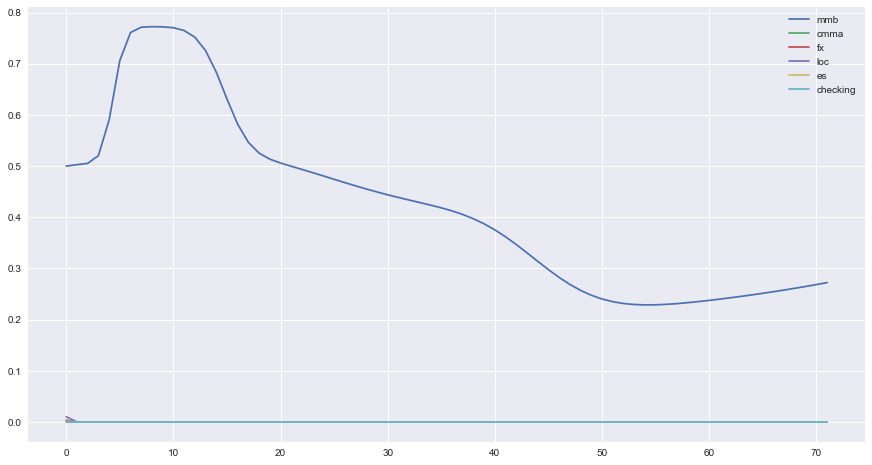

In [291]:
esp_product_probability_over_time(esp_money_market_conditional_probabilities)

In [249]:
model.get_local_independencies()

(collateral_mma _|_ fx_products, enterprise_sweep, checking_usd, letters_of_credit, cash_management | money_market_bonus)
(checking_usd _|_ fx_products, enterprise_sweep, collateral_mma, letters_of_credit, cash_management | money_market_bonus)
(cash_management _|_ fx_products, enterprise_sweep, checking_usd, collateral_mma, letters_of_credit | money_market_bonus)
(fx_products _|_ enterprise_sweep, checking_usd, collateral_mma, letters_of_credit, cash_management | money_market_bonus)
(letters_of_credit _|_ fx_products, enterprise_sweep, checking_usd, collateral_mma, cash_management | money_market_bonus)
(enterprise_sweep _|_ fx_products, checking_usd, collateral_mma, letters_of_credit, cash_management | money_market_bonus)

In [252]:
from IPython.display import Image
print(factor_mmb_checking)

╒══════════════════════╤════════════════╤════════════════════════════════════════╕
│ money_market_bonus   │ checking_usd   │   phi(money_market_bonus,checking_usd) │
╞══════════════════════╪════════════════╪════════════════════════════════════════╡
│ money_market_bonus_0 │ checking_usd_0 │                                 1.0000 │
├──────────────────────┼────────────────┼────────────────────────────────────────┤
│ money_market_bonus_0 │ checking_usd_1 │                                 0.0000 │
├──────────────────────┼────────────────┼────────────────────────────────────────┤
│ money_market_bonus_1 │ checking_usd_0 │                                 0.9978 │
├──────────────────────┼────────────────┼────────────────────────────────────────┤
│ money_market_bonus_1 │ checking_usd_1 │                                 0.0022 │
╘══════════════════════╧════════════════╧════════════════════════════════════════╛


In [220]:
belief_propagation = BeliefPropagation(model)

In [221]:
belief = belief_propagation.query(variables=['collateral_mma'])

In [237]:
belief['collateral_mma'].values

array([  1.00000000e+00,   1.35741448e-53])

In [267]:
factor_mmb_cmma = Factor(variables=['money_market_bonus', 'collateral_mma'],
                    cardinality=[2, 2],
                    values=[dict_of_esp_money_market_cpd['mmb0_cmma0'], dict_of_esp_money_market_cpd['mmb0_cmma1'],
                            dict_of_esp_money_market_cpd['mmb1_cmma0'], dict_of_esp_money_market_cpd['mmb1_cmma1']])
factor_mmb_cm = Factor(variables=['money_market_bonus', 'cash_management'],
                    cardinality=[2, 2],
                    values=[dict_of_esp_money_market_cpd['mmb0_cm0'], dict_of_esp_money_market_cpd['mmb0_cm1'],
                            dict_of_esp_money_market_cpd['mmb1_cm0'], dict_of_esp_money_market_cpd['mmb1_cm1']])
factor_mmb_fx = Factor(variables=['money_market_bonus', 'fx_products'],
                     cardinality=[2, 2],
                     values=[dict_of_esp_money_market_cpd['mmb0_fx0'], dict_of_esp_money_market_cpd['mmb0_fx1'],
                            dict_of_esp_money_market_cpd['mmb1_fx0'], dict_of_esp_money_market_cpd['mmb1_fx1']])
factor_mmb_loc = Factor(variables=['money_market_bonus', 'letters_of_credit'],
                     cardinality=[2, 2],
                     values=[dict_of_esp_money_market_cpd['mmb0_loc0'], dict_of_esp_money_market_cpd['mmb0_loc1'],
                            dict_of_esp_money_market_cpd['mmb1_loc0'], dict_of_esp_money_market_cpd['mmb1_loc1']])
factor_mmb_es = Factor(variables=['money_market_bonus', 'enterprise_sweep'],
                     cardinality=[2, 2],
                     values=[dict_of_esp_money_market_cpd['mmb0_es0'], dict_of_esp_money_market_cpd['mmb0_es1'],
                            dict_of_esp_money_market_cpd['mmb1_es0'], dict_of_esp_money_market_cpd['mmb1_es1']])  
factor_mmb_checking = Factor(variables=['money_market_bonus', 'checking_usd'],
                     cardinality=[2, 2],
                     values=[dict_of_esp_money_market_cpd['mmb0_checking0'], dict_of_esp_money_market_cpd['mmb0_checking1'],
                            dict_of_esp_money_market_cpd['mmb1_checking0'], dict_of_esp_money_market_cpd['mmb1_checking1']])   

# factor_cmma_checking = Factor(variables=['collateral_mma', 'checking_usd'],
#                     cardinality=[2, 2],
#                     values=[.1, .9, .5, .5])

# factor_cmma_cm = Factor(variables=['collateral_mma', 'checking_usd'],
#                     cardinality=[2, 2],
#                     values=[.4, .6, .3, .7])

# factor_cmma_fx = Factor(variables=['collateral_mma', 'fx_products'],
#                     cardinality=[2, 2],
#                     values=[.2, .8, .9, .1])

# factor_cmma_loc = Factor(variables=['collateral_mma', 'letters_of_credit'],
#                     cardinality=[2, 2],
#                     values=[.3, .7, .4, .6])

# factor_cmma_es = Factor(variables=['collateral_mma', 'letters_of_credit'],
#                     cardinality=[2, 2],
#                     values=[.1, .9, .4, .6])

model.add_factors(factor_mmb_cmma, factor_mmb_cm,
                   factor_mmb_fx, factor_mmb_loc,factor_mmb_es ,factor_mmb_checking)#,
belief_propagation = BeliefPropagation(model)
tes = belief_propagation.query(variables=['cash_management','enterprise_sweep','money_market_bonus'])

In [292]:
print(model)

In [268]:
tes['cash_management'].values

array([  1.00000000e+00,   3.10604417e-96])

In [269]:
tes['enterprise_sweep'].values

array([  1.00000000e+000,   1.27548181e-121])

In [271]:
tes['money_market_bonus'].values

array([ 0.75236808,  0.24763192])